<a href="https://colab.research.google.com/github/RobinW24/Projets-Cl-ment-Robin-WABO/blob/main/2_Robin_WABO_01_hands_on_intro_to_deep_learning_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> <img src="https://drive.google.com/uc?id=1KVgtb9QcS7Ewynmzr2ivW4hC9ra-Te1u" width="50" align="left">  Hands-On - Introduction to Deep Learning (Part 2/2) </H1>

Author: Lina Faik   
Last modification: 09/2024

This notebook is provided solely for the educational benefit of the students enrolled in Sorbonne Data Analytics - Machine Learning 2. Its contents are intended for personal use only and may not be reproduced, distributed, or shared without explicit permission.

## Objective
This notebook aims to provide beginners with practical insights into two fundamental applications of deep learning: computer vision and natural language processing (NLP).

### Table of contents
- Use Case #1: Handwriting recognition
- Use case #2: Sentiment Analysis

### Note
<img hspace="50" vspace="20" src="https://drive.google.com/uc?export=view&id=1ONuMmPqDwt7H13owDPvYokzUMmjN_7eN" height="400" align="right" >

Please note that you should save a copy of the notebook to your google drive if you want to keep track of the code you ran or the changes you made.  To do this, go to *Files > Save a Copy* as in the screenshot.

# Use Case #1: Handwriting recognition

The first use case is around handwriting recognition, where the aim is to harness deep learning techniques to train a model proficient in accurately deciphering handwritten digits.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

import keras


## 1.1. Data loading

- Load the data by executing the cell below.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


- Explore some examples of training data by running the cell below.

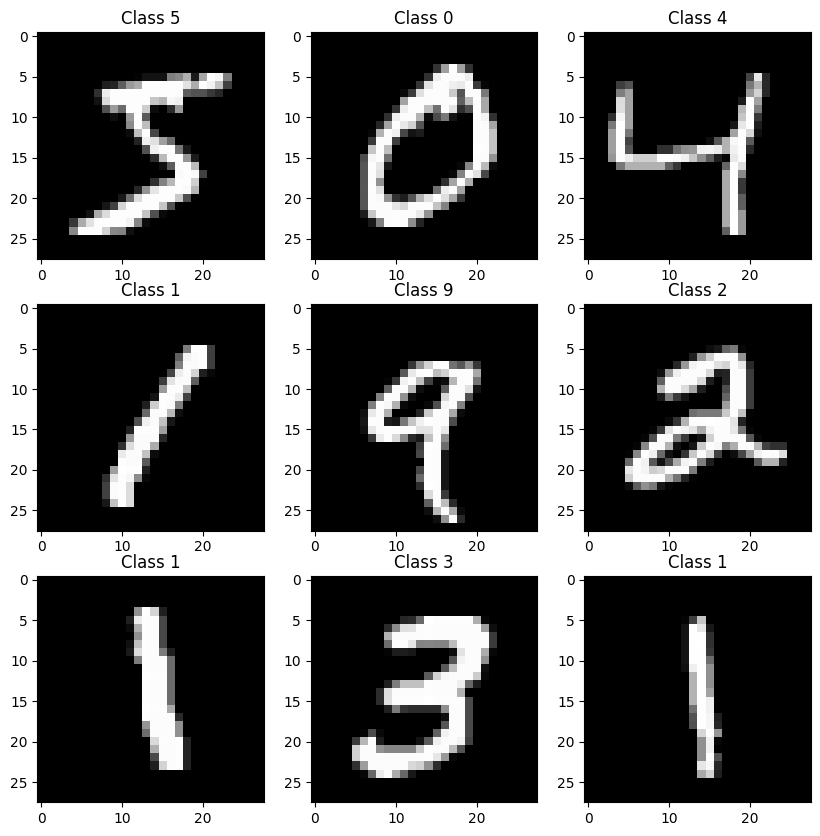

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

### About data
The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. The aim of our model is to be able to detect the digit displayed based on the input image. It is therefore a multi-class classification problem.

## 1.2. Data preparation

In a neural network, each training example requires a single vector. Therefore, the input must be reshaped so that each 28x28 image forms a single 784-dimensional vector. Additionally, the inputs will be scaled to fall within the range of [0-1] instead of [0-255].

- Reshape the training and testing datasets so that each image becomes a single 784-dimensional vector. You can use numpy method `.reshape`.
- Convert the data type of both training and testing datasets to 'float32'.
- Scale down the pixel values of both training and testing datasets to fall within the range of [0-1]. You can simply need to divide by 255.
- Print the shapes of the training and testing matrices to check their dimensions.

In [ ]:
# Insert your code here.

In [9]:
X_train.shape[0]

60000

In [15]:
#@title

n_input = 784

X_train = X_train.reshape(X_train.shape[0], n_input)
X_test = X_test.reshape(X_test.shape[0], n_input)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [10]:
n = 28*28
X_train = X_train.reshape(X_train.shape[0],n).astype("float32")
X_test = X_test.reshape(X_test.shape[0],n).astype("float32")

X_train = X_train / 255
X_test = X_test / 255

X_train.shape

(60000, 784)

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

- Create Y_train and Y_test the target in the one-hot format, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```
You can use the keras function `keras.utils.to_categorical`.



In [ ]:
# Insert your code here.

In [24]:
#@title
num_classes = 10

y_test_train = keras.utils.to_categorical(y_train, num_classes = num_classes)
y_test_test = keras.utils.to_categorical(y_test, num_classes = num_classes)
y_test_test


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y_train.shape

(60000,)

## 1.3. Model definition

- Create a sequential model.
- Add a dense layer with 512 units and specify the input shape as (784,).
- Add a ReLU activation function after the first dense layer.
- Apply a dropout regularization with a rate of 0.2.
- Add another dense layer with 512 units.
- Use a ReLU activation function after the second dense layer.
- Apply dropout regularization with a rate of 0.2.
- Add a dense layer with 10 units.
- Apply a softmax activation function after the third dense layer.

In [ ]:
# Insert you code here.

In [29]:
#@title

model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(n_input,)),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10),
    keras.layers.Activation('softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Compile the model.
- Specify 'categorical_crossentropy' as the loss function.
- Use 'adam' optimizer.
- Specify 'accuracy' as the metric to monitor during training.

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Insert your code here.

In [34]:
#@title

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

## 1.4. Model training

Let's train the model.
- Use the training dataset `X_train` and corresponding labels `Y_train`.
- Set the batch size to 128.
- Train the model for 4 epochs.
- Set verbosity level to 1.
- Use the testing dataset `X_test` and corresponding labels `Y_test` for validation during training.

In [ ]:
# Insert you code here.

In [35]:
#@title

model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=4,
    verbose=1,
    validation_data=(X_test, Y_test)
    )

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1121 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1134 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1117 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1118 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011


Evaluate the model's performance.
- Use the testing dataset `X_test` and corresponding labels `Y_test`.
- Print the test score and the test accuracy.

In [ ]:
# Insert your code here.

In [ ]:
#@title

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

## 1.5. Inference

Now let's take a look at the model's predictions, both correct and incorrect.

- Make predictions using the model on the `X_test` test data set.
- Note that the model results are probabilities for each class. You need to determine the predicted classes `predicted_classes` by selecting the maximum probability indices along axis 1.

In [ ]:
# Insert your code here.

In [ ]:
#@title

y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis = 1)

- Visualize the examples of cases where predictions are accurate and inaccurate by running the next cell:

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Use case #2: Sentiment Analysis

## 2.1. Data loading

- Load the data by executing the cell below.

In [36]:
import keras

top_words = 5000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
# verification de la taille de donnéees pour savoir si elle est equilibré
np.bincount(y_train)

array([12500, 12500])

What is the size of the matrices? How many sentiment classes are there? Is the dataset unbalanced?
- Write and run the code that answers these questions

In [ ]:
# Insert your code here.

In [42]:
#@title

# Count the occurrences of each class
class_percentages_train = np.bincount(y_train) / len(y_train) * 100
class_percentages_test = np.bincount(y_test) / len(y_test) * 100

# Display the results
print("Train")
print(f"X_train shape: {X_train.shape}")
for i, percentage in enumerate(class_percentages_train):
    print(f"Class {i}: {percentage:.2f}%")
print()
print("Test")
print(f"X_test shape: {X_test.shape}")
for i, percentage in enumerate(class_percentages_train):
    print(f"Class {i}: {percentage:.2f}%")


Train
X_train shape: (25000,)
Class 0: 50.00%
Class 1: 50.00%

Test
X_test shape: (25000,)
Class 0: 50.00%
Class 1: 50.00%


### About data

The data used is the Large Movie Review Dataset, commonly known as IMDB, containing 25,000 movie reviews. Initially collected by Stanford researchers, it was prominently featured in a 2011 research paper where the data was partitioned into a 50/50 split for training and testing purposes. An accuracy of 88.89% was achieved.

Keras facilitates seamless access to the IMDB dataset through the `imdb.load_data()` function, streamlining its integration into neural networks and deep learning models.

Note that each word in the reviews has been substituted with an integer reflecting its relative frequency within the dataset. Consequently, the reviews are represented as sequences of integers.

## 2.2. Data preparation

To train a neural network, it's essential to ensure that:
1. Input data is in numerical format. This transformation, already covered by keras' `load_data` function, converts movie reviews into continuous vector representations, a technique known as word embedding, widely embraced in NLP.
2. All sequences in the dataset share a uniform length. This is where Keras' `pad_sequence` function becomes invaluable. It adjusts sequence lengths by padding shorter sequences with zeros and truncating longer ones, ensuring consistency in input dimensions.

- Set the maximum review length to 500 characters
- Use the pad_sequences function from the keras.preprocessing.sequence module to pad/truncate the training sequences to the specified maximum length
- Similarly, pad/truncate the test sequences to the same maximum length

In [ ]:
# Insert your code here.

In [45]:
#@title

# truncate and pad input sequences
max_review_length = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length)
X_train.shape

(25000, 500)

In [46]:
X_test.shape

(25000, 500)

## 2.3. Model definition

Let's define a small and simple LSTM and observe the accuracy.
- The first layer is the Embedded layer that uses 32-length vectors to represent each word.

```
keras.layers.Embedding(top_words, embedding_vecor_length, input_length=max_review_length)
```

- Add a second layer is the LSTM layer with 100 memory units.
- Finally, for the classification task at hand, incorporate a Dense output layer featuring a single neuron. Use a sigmoid activation function that will enable binary predictions (0 or 1) for the two classes.

In [ ]:
# Insert your code here.

In [47]:
#@title

# create the model
embedding_vecor_length = 32
model = keras.Sequential([
    keras.layers.Embedding(top_words, embedding_vecor_length, input_length=max_review_length),
    keras.layers.LSTM(100),
    keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Now, let's proceed to compile the model.
- Given that we're dealing with a binary classification task, opt for the log loss function, `binary_crossentropy` in keras
- Use the efficient Adam optimization algorithm
- Add accuracy as an additional metric to track during the training

In [ ]:
# Insert your code here.

In [48]:
#@title

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 2.4. Model training

- Train the model for only two epochs with a batch size of 64.
- Store the model training metrics in a variable named 'history'.

In [ ]:
# Insert your code here.

In [49]:
#@title

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.6661 - loss: 0.5841 - val_accuracy: 0.7820 - val_loss: 0.4651
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8352 - loss: 0.3814 - val_accuracy: 0.8573 - val_loss: 0.3319
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8988 - loss: 0.2573 - val_accuracy: 0.8602 - val_loss: 0.3240


- Evaluate the model on the test set. What do you think of the accuracy?

In [ ]:
# Insert your code here.

In [51]:
y_pred_test =model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


In [52]:
y_pred_test

array([[0.15000299],
       [0.958767  ],
       [0.6603052 ],
       ...,
       [0.03741872],
       [0.22118585],
       [0.8402209 ]], dtype=float32)

In [50]:
#@title
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.02%


## 2.5. Model fine-tuning

It's common for recurrent neural networks such as LSTM to overfit. Incorporating dropout can help in mitigating this issue.

- Create a new model with additional dropout layers positioned between the embedding and LSTM layers, as well as between the LSTM and dense output layers.
- Compile and train the model.
- Assess the model's performance on the test set.

In [ ]:
# Insert your code here.

In [53]:
#@title

# create the model
embedding_vecor_length = 32
model = keras.Sequential([
    keras.layers.Embedding(top_words, embedding_vecor_length, input_length=max_review_length),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6449 - loss: 0.6018 - val_accuracy: 0.6871 - val_loss: 0.5983
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7986 - loss: 0.4355 - val_accuracy: 0.8584 - val_loss: 0.3409
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8756 - loss: 0.3232 - val_accuracy: 0.8574 - val_loss: 0.3321


# References


[1] Github, [keras-mnist-tutorial](https://github.com/wxs/keras-mnist-tutorial/tree/master)

[2] Jason Brownlee, [Sequence Classification with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/), 2022